In [12]:
import gzip
import json
import pandas as pd
import matplotlib.pyplot as plt
import random
from collections import Counter
from urllib.request import urlretrieve


# 1.- DESCARGA Y LECTURA DE DATOS

In [13]:
url = 'http://snap.stanford.edu/data/amazon/productGraph/categoryFiles'
filename = 'reviews_Video_Games_5.json.gz'
urlretrieve(url, filename)

('reviews_Video_Games_5.json.gz', <http.client.HTTPMessage at 0x21b14cdecd0>)

In [14]:
data = []

max_reviews = 100000

with gzip.open('./reviews_Video_Games_5.json.gz', 'rb') as f:
    for i,l in enumerate(f):
        if i == max_reviews:
            break
        data.append(json.loads(l.strip()))
        
df = pd.DataFrame.from_dict(data)

Comprobamos cuantos valores ha descargado

In [15]:
print(f'Reviews descargados: {len(df)}')

Reviews descargados: 100000


Y miramos una muestra de una de las reviews

In [16]:
df.loc[random.randint(0, len(df))]


reviewerID                                            API8Q4Y20969U
asin                                                     B00000I1BT
reviewerName                                         RPG king "KGM"
helpful                                                      [5, 6]
reviewText        Doom and Quake have been two of the most incre...
overall                                                         5.0
summary                     Now this is where the legend all began.
unixReviewTime                                           1132099200
reviewTime                                              11 16, 2005
Name: 1185, dtype: object

Al ver estos datos, nos quedamos solo con dos campos, "ReviewText" y "Overall"

In [17]:
df_reviews = df[['reviewText', 'overall']]
df_reviews.head().T



,0,1,2,3,4
reviewText,Installing the game was a struggle (because of...,If you like rally cars get this game you will ...,1st shipment received a book instead of the ga...,"I got this version instead of the PS3 version,...",I had Dirt 2 on Xbox 360 and it was an okay ga...
overall,1.0,4.0,1.0,3.0,4.0


## Analisis del corpus

### 1.- Distribución de las puntuaciones

<Axes: xlabel='overall'>

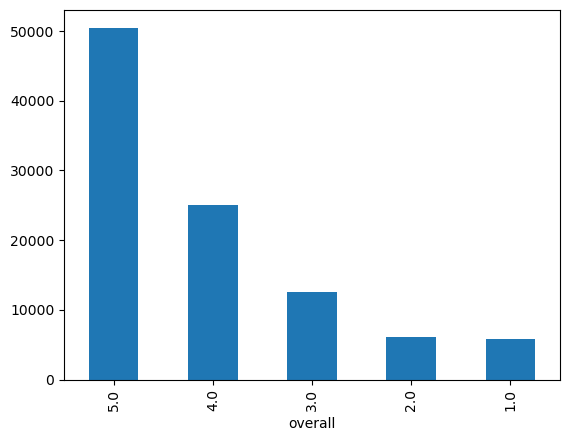

In [18]:
#Sacamos un plot con la distribución de las puntuaciones
df_reviews['overall'].value_counts().plot(kind='bar')

In [19]:
print(df_reviews['overall'].value_counts())

overall
5.0    50497
4.0    25000
3.0    12574
2.0     6126
1.0     5803
Name: count, dtype: int64


### 2.- Distribución de las puntuaciones en +/-

Suponemos que las puntuaciones entre 1 y 3 las consideramos negativas y las puntuaciones superiores son positivas

C:\Users\aleja\AppData\Local\Temp\ipykernel_27024\3473181598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews['sentiment'] = df_reviews['overall'].apply(lambda x: 'Negativas' if x <= 3 else 'Positivas')


<Axes: xlabel='sentiment'>

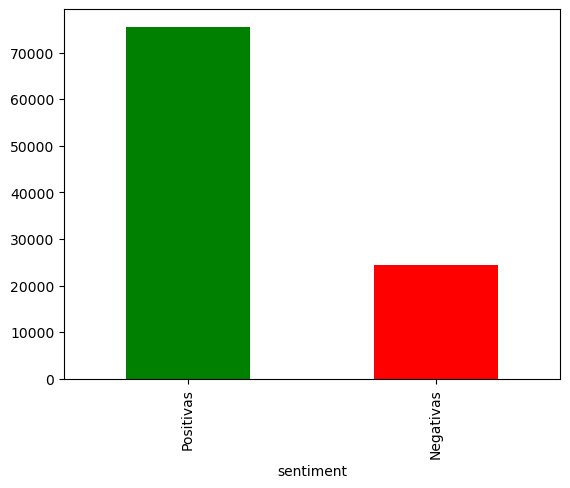

In [20]:
df_reviews['sentiment'] = df_reviews['overall'].apply(lambda x: 'Negativas' if x <= 3 else 'Positivas')
df_reviews['sentiment'].value_counts().plot(kind='bar')
df_reviews['sentiment'].value_counts().plot(kind='bar', color=['green', 'red'])



### 3.- Cardinalidad del corpus

Calculamos la cantidad de palabras(antes de realizar preprocesado) del conjunto de reviews

In [21]:
vocabulary = []

for review in df_reviews['reviewText']:
    for word in review.split():
        vocabulary.append(word)

print(f'Número de palabras en el vocabulario: {len(vocabulary)}')

Número de palabras en el vocabulario: 21508759


Sacamos el top 10 de palabras del corpus

In [22]:
word_freq = Counter(vocabulary)
word_freq.most_common(10)


[('the', 1054602),
 ('and', 581333),
 ('to', 554001),
 ('a', 528269),
 ('of', 441399),
 ('is', 387475),
 ('you', 345677),
 ('I', 307557),
 ('game', 268657),
 ('in', 245491)]

### 4.- Guardamos el dataframe

In [24]:
#Guardamos df_reviews en un csv dentro de una carpeta llamada data
df_reviews.to_csv('data/reviews.csv', index=False)

## Conclusiones

Como podemos observar en los diagramas de barras, existen muchas más opiniones positivas que negativas en las reviews de los videojuegos, con una diferencia bastante amplia.

Con respecto al análisis de las palabras, no se pueden sacar ningún tipo de conclusión en este punto ya que las palabras que más abundan en el corpus son genéricas. Dejaremos este análisis para el próximos notebook después de realizar el preprocesado.